In [1]:
#Reader for Suicide File
import pandas as pd
from collections import OrderedDict
import numpy as np

# main suicide csv load and clean-up
csv_path = "reviseddata.csv"
suicide_df = pd.read_csv(csv_path, low_memory=False)
suicide_df2 = suicide_df.dropna()
suicide_df2
# happiness df load by year
csv_path = "Happiness_Reports/2015.csv"
happy15_df = pd.read_csv(csv_path, low_memory=False)
csv_path = "Happiness_Reports/2016.csv"
happy16_df = pd.read_csv(csv_path, low_memory=False)
csv_path = "Happiness_Reports/2017.csv"
happy17_df = pd.read_csv(csv_path, low_memory=False)
csv_path = "Happiness_Reports/2018.csv"
happy18_df = pd.read_csv(csv_path, low_memory=False)

# put suffix on columns
happy15_df.columns = happy15_df.columns.map(lambda x: str(x) + "_15")
happy16_df.columns = happy16_df.columns.map(lambda x: str(x) + "_16")
happy17_df.columns = happy17_df.columns.map(lambda x: str(x) + "_17")
happy18_df.columns = happy18_df.columns.map(lambda x: str(x) + "_18")

# merge df's into one
merge_df = pd.merge(suicide_df2, happy15_df, left_on='Country Name',right_on='Country_15', suffixes=('suicide15','happy15'))
merge_df2 = pd.merge(merge_df, happy16_df, left_on='Country Name',right_on='Country_16', suffixes=('suicide16','happy16'))
merge_df3 = pd.merge(merge_df2, happy17_df, left_on='Country Name',right_on='Country_17', suffixes=('suicide17','happy17'))
merge_df4 = pd.merge(merge_df3, happy18_df, left_on='Country Name',right_on='Country or region_18', suffixes=('suicide18','happy18'))

# list of columns to rearrange
pops=[ '2015', '2016', '2017', '2018','Country_15',
 'Region_15',
 'Happiness Rank_15',
 'Happiness Score_15',
 'Standard Error_15',
 'Economy (GDP per Capita)_15',
 'Family_15',
 'Health (Life Expectancy)_15',
 'Freedom_15',
 'Trust (Government Corruption)_15',
 'Generosity_15',
 'Dystopia Residual_15',
 'Country_16',
 'Region_16',
 'Happiness Rank_16',
 'Happiness Score_16',
 'Lower Confidence Interval_16',
 'Upper Confidence Interval_16',
 'Economy (GDP per Capita)_16',
 'Family_16',
 'Health (Life Expectancy)_16',
 'Freedom_16',
 'Trust (Government Corruption)_16',
 'Generosity_16',
 'Dystopia Residual_16',
 'Country_17',
 'Happiness.Rank_17',
 'Happiness.Score_17',
 'Whisker.high_17',
 'Whisker.low_17',
 'Economy..GDP.per.Capita._17',
 'Family_17',
 'Health..Life.Expectancy._17',
 'Freedom_17',
 'Generosity_17',
 'Trust..Government.Corruption._17',
 'Dystopia.Residual_17',
 'Overall rank_18',
 'Country or region_18',
 'Score_18',
 'GDP per capita_18',
 'Social support_18',
 'Healthy life expectancy_18',
 'Freedom to make life choices_18',
 'Generosity_18',
 'Perceptions of corruption_18']
cols = list(merge_df4.columns.values)

# pop columns
for col in pops:
       cols.pop(cols.index(col))

#return to correct order
mergedfinaldf = merge_df4[cols+['2015', 'Country_15',
 'Region_15',
 'Happiness Rank_15',
 'Happiness Score_15',
 'Standard Error_15',
 'Economy (GDP per Capita)_15',
 'Family_15',
 'Health (Life Expectancy)_15',
 'Freedom_15',
 'Trust (Government Corruption)_15',
 'Generosity_15',
 'Dystopia Residual_15','2016','Country_16',
 'Region_16',
 'Happiness Rank_16',
 'Happiness Score_16',
 'Lower Confidence Interval_16',
 'Upper Confidence Interval_16',
 'Economy (GDP per Capita)_16',
 'Family_16',
 'Health (Life Expectancy)_16',
 'Freedom_16',
 'Trust (Government Corruption)_16',
 'Generosity_16',
 'Dystopia Residual_16','2017', 'Country_17',
 'Happiness.Rank_17',
 'Happiness.Score_17',
 'Whisker.high_17',
 'Whisker.low_17',
 'Economy..GDP.per.Capita._17',
 'Family_17',
 'Health..Life.Expectancy._17',
 'Freedom_17',
 'Generosity_17',
 'Trust..Government.Corruption._17',
 'Dystopia.Residual_17','2018',
 'Overall rank_18',
 'Country or region_18',
 'Score_18',
 'GDP per capita_18',
 'Social support_18',
 'Healthy life expectancy_18',
 'Freedom to make life choices_18',
 'Generosity_18',
 'Perceptions of corruption_18']]




# individual years
merged2015df = mergedfinaldf.drop(['Total', 'Max', 'Min', 'Avg', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2019', '2016', 'Country_16', 'Region_16',
       'Happiness Rank_16', 'Happiness Score_16',
       'Lower Confidence Interval_16', 'Upper Confidence Interval_16',
       'Economy (GDP per Capita)_16', 'Family_16',
       'Health (Life Expectancy)_16', 'Freedom_16',
       'Trust (Government Corruption)_16', 'Generosity_16',
       'Dystopia Residual_16', '2017', 'Country_17', 'Happiness.Rank_17',
       'Happiness.Score_17', 'Whisker.high_17', 'Whisker.low_17',
       'Economy..GDP.per.Capita._17', 'Family_17',
       'Health..Life.Expectancy._17', 'Freedom_17', 'Generosity_17',
       'Trust..Government.Corruption._17', 'Dystopia.Residual_17', '2018',
       'Overall rank_18', 'Country or region_18', 'Score_18',
       'GDP per capita_18', 'Social support_18', 'Healthy life expectancy_18',
       'Freedom to make life choices_18', 'Generosity_18',
       'Perceptions of corruption_18'],axis=1)
merged2015df.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2015_Suicides/100k', 'Country_15', 'Region_15', 'Happiness Rank_15',
       'Happiness Score_15', 'Standard Error_15',
       'Economy (GDP per Capita)_15', 'Family_15',
       'Health (Life Expectancy)_15', 'Freedom_15',
       'Trust (Government Corruption)_15', 'Generosity_15',
       'Dystopia Residual_15']
merged2016df = mergedfinaldf.drop(['Total', 'Max', 'Min', 'Avg', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2019', '2015', 'Country_15', 'Region_15', 'Happiness Rank_15',
       'Happiness Score_15', 'Standard Error_15',
       'Economy (GDP per Capita)_15', 'Family_15',
       'Health (Life Expectancy)_15', 'Freedom_15',
       'Trust (Government Corruption)_15', 'Generosity_15',
       'Dystopia Residual_15', '2017', 'Country_17', 'Happiness.Rank_17',
       'Happiness.Score_17', 'Whisker.high_17', 'Whisker.low_17',
       'Economy..GDP.per.Capita._17', 'Family_17',
       'Health..Life.Expectancy._17', 'Freedom_17', 'Generosity_17',
       'Trust..Government.Corruption._17', 'Dystopia.Residual_17', '2018',
       'Overall rank_18', 'Country or region_18', 'Score_18',
       'GDP per capita_18', 'Social support_18', 'Healthy life expectancy_18',
       'Freedom to make life choices_18', 'Generosity_18',
       'Perceptions of corruption_18'],axis=1)
merged2016df.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2016_Suicides/100k', 'Country_16', 'Region_16', 'Happiness Rank_16',
       'Happiness Score_16', 'Lower Confidence Interval_16',
       'Upper Confidence Interval_16', 'Economy (GDP per Capita)_16',
       'Family_16', 'Health (Life Expectancy)_16', 'Freedom_16',
       'Trust (Government Corruption)_16', 'Generosity_16',
       'Dystopia Residual_16']
merged2017df = mergedfinaldf.drop(['Total', 'Max', 'Min', 'Avg', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2019', '2015', 'Country_15', 'Region_15', 'Happiness Rank_15',
       'Happiness Score_15', 'Standard Error_15',
       'Economy (GDP per Capita)_15', 'Family_15',
       'Health (Life Expectancy)_15', 'Freedom_15',
       'Trust (Government Corruption)_15', 'Generosity_15',
       'Dystopia Residual_15', '2016', 'Country_16', 'Region_16',
       'Happiness Rank_16', 'Happiness Score_16',
       'Lower Confidence Interval_16', 'Upper Confidence Interval_16',
       'Economy (GDP per Capita)_16', 'Family_16',
       'Health (Life Expectancy)_16', 'Freedom_16',
       'Trust (Government Corruption)_16', 'Generosity_16',
       'Dystopia Residual_16', '2018',
       'Overall rank_18', 'Country or region_18', 'Score_18',
       'GDP per capita_18', 'Social support_18', 'Healthy life expectancy_18',
       'Freedom to make life choices_18', 'Generosity_18',
       'Perceptions of corruption_18'],axis=1)
merged2017df.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2017_Suicides/100k', 'Country_17', 'Happiness.Rank_17', 'Happiness.Score_17',
       'Whisker.high_17', 'Whisker.low_17', 'Economy..GDP.per.Capita._17',
       'Family_17', 'Health..Life.Expectancy._17', 'Freedom_17',
       'Generosity_17', 'Trust..Government.Corruption._17',
       'Dystopia.Residual_17']
merged2018df = mergedfinaldf.drop(['Total', 'Max', 'Min', 'Avg', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2019', '2015', 'Country_15', 'Region_15', 'Happiness Rank_15',
       'Happiness Score_15', 'Standard Error_15',
       'Economy (GDP per Capita)_15', 'Family_15',
       'Health (Life Expectancy)_15', 'Freedom_15',
       'Trust (Government Corruption)_15', 'Generosity_15',
       'Dystopia Residual_15', '2016', 'Country_16', 'Region_16',
       'Happiness Rank_16', 'Happiness Score_16',
       'Lower Confidence Interval_16', 'Upper Confidence Interval_16',
       'Economy (GDP per Capita)_16', 'Family_16',
       'Health (Life Expectancy)_16', 'Freedom_16',
       'Trust (Government Corruption)_16', 'Generosity_16',
       'Dystopia Residual_16', '2017', 'Country_17', 'Happiness.Rank_17',
       'Happiness.Score_17', 'Whisker.high_17', 'Whisker.low_17',
       'Economy..GDP.per.Capita._17', 'Family_17',
       'Health..Life.Expectancy._17', 'Freedom_17', 'Generosity_17',
       'Trust..Government.Corruption._17', 'Dystopia.Residual_17'],axis=1)
merged2018df.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2018_Suicides/100k', 'Overall rank_18', 'Country or region_18', 'Score_18',
       'GDP per capita_18', 'Social support_18', 'Healthy life expectancy_18',
       'Freedom to make life choices_18', 'Generosity_18',
       'Perceptions of corruption_18']
mergedfinalfiltered = mergedfinaldf.drop(['2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2019'],axis=1)
# suicide filtered file
suicide_filtered = suicide_df2.drop(['Total', 'Max', 'Min', 'Avg', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2019'],axis=1)


dflist = ['mergedfinaldf','merged2015df','merged2016df','merged2017df','merged2018df','mergedfinalfiltered','suicide_filtered']



In [2]:
dflist

['mergedfinaldf',
 'merged2015df',
 'merged2016df',
 'merged2017df',
 'merged2018df',
 'mergedfinalfiltered',
 'suicide_filtered']

In [3]:
pd.set_option('display.max_columns', None)

In [79]:
mergedfinalfiltered

,Country Name,Country Code,Indicator Name,Indicator Code,Total,Max,Min,Avg,2015,Country_15,Region_15,Happiness Rank_15,Happiness Score_15,Standard Error_15,Economy (GDP per Capita)_15,Family_15,Health (Life Expectancy)_15,Freedom_15,Trust (Government Corruption)_15,Generosity_15,Dystopia Residual_15,2016,Country_16,Region_16,Happiness Rank_16,Happiness Score_16,Lower Confidence Interval_16,Upper Confidence Interval_16,Economy (GDP per Capita)_16,Family_16,Health (Life Expectancy)_16,Freedom_16,Trust (Government Corruption)_16,Generosity_16,Dystopia Residual_16,2017,Country_17,Happiness.Rank_17,Happiness.Score_17,Whisker.high_17,Whisker.low_17,Economy..GDP.per.Capita._17,Family_17,Health..Life.Expectancy._17,Freedom_17,Generosity_17,Trust..Government.Corruption._17,Dystopia.Residual_17,2018,Overall rank_18,Country or region_18,Score_18,GDP per capita_18,Social support_18,Healthy life expectancy_18,Freedom to make life choices_18,Generosity_18,Perceptions of corruption_18
0,Afghanistan,AFG,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,89.2,5,3.9,4.46,4.0,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,4.0,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,4.1,Afghanistan,141,3.794,3.873661,3.714338,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801,4.1,145,Afghanistan,3.632,0.332,0.537,0.255,0.085,0.191,0.036
1,Angola,AGO,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,146.2,8.8,6,7.31,6.5,Angola,Sub-Saharan Africa,137,4.033,0.04758,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939,6.2,Angola,Sub-Saharan Africa,141,3.866,3.753,3.979,0.84731,0.66366,0.04991,0.00589,0.08434,0.12071,2.09459,6.0,Angola,140,3.795,3.951642,3.638358,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482,6.0,142,Angola,3.795,0.730,1.125,0.269,0.000,0.079,0.061
2,Albania,ALB,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,117.5,8.2,4.3,5.88,4.8,Albania,Central and Eastern Europe,95,4.959,0.05013,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,4.7,Albania,Central and Eastern Europe,109,4.655,4.546,4.764,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816,4.7,Albania,109,4.644,4.752464,4.535536,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442,4.5,112,Albania,4.586,0.916,0.817,0.790,0.419,0.149,0.032
3,United Arab Emirates,ARE,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,151.4,8.6,5.6,7.57,6.5,United Arab Emirates,Middle East and Northern Africa,20,6.901,0.03729,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,2.24743,6.0,United Arab Emirates,Middle East and Northern Africa,28,6.573,6.494,6.652,1.57352,0.87114,0.72993,0.56215,0.35561,0.26591,2.21507,5.6,United Arab Emirates,21,6.648,6.722047,6.573952,1.626343,1.266410,0.726798,0.608345,0.360942,0.324490,1.734704,6.0,20,United Arab Emirates,6.774,2.096,0.776,0.670,0.284,0.186,NaN
4,Argentina,ARG,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,177.8,10.3,8.3,8.89,8.3,Argentina,Latin America and Caribbean,30,6.574,0.04612,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600,8.3,Argentina,Latin America and Caribbean,26,6.650,6.560,6.740,1.15137,1.06612,0.69711,0.42284,0.07296,0.10989,3.12985,8.9,Argentina,24,6.599,6.690085,6.507915,1.185295,1.440451,0.695137,0.494519,0.109457,0.059740,2.614005,9.2,29,Argentina,6.388,1.073,1.468,0.744,0.570,0.062,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Uzbekistan,UZB,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,177.5,10.1,8,8.88,9.2,Uzbekistan,Central and Eastern Europe,44,6.003,0.04361,0.63244,1.34043,0.59772,0.65821,0.30826,0.22837,2.23741,9.1,Uzbekistan,Central and Eastern Europe,49,5.987,5.896,6.078,0.73591,1

In [81]:
mergedfinalfiltered.loc[mergedfinalfiltered['2015'] == 34.9]

,Country Name,Country Code,Indicator Name,Indicator Code,Total,Max,Min,Avg,2015,Country_15,Region_15,Happiness Rank_15,Happiness Score_15,Standard Error_15,Economy (GDP per Capita)_15,Family_15,Health (Life Expectancy)_15,Freedom_15,Trust (Government Corruption)_15,Generosity_15,Dystopia Residual_15,2016,Country_16,Region_16,Happiness Rank_16,Happiness Score_16,Lower Confidence Interval_16,Upper Confidence Interval_16,Economy (GDP per Capita)_16,Family_16,Health (Life Expectancy)_16,Freedom_16,Trust (Government Corruption)_16,Generosity_16,Dystopia Residual_16,2017,Country_17,Happiness.Rank_17,Happiness.Score_17,Whisker.high_17,Whisker.low_17,Economy..GDP.per.Capita._17,Family_17,Health..Life.Expectancy._17,Freedom_17,Generosity_17,Trust..Government.Corruption._17,Dystopia.Residual_17,2018,Overall rank_18,Country or region_18,Score_18,GDP per capita_18,Social support_18,Healthy life expectancy_18,Freedom to make life choices_18,Generosity_18,Perceptions of corruption_18
70,Lithuania,LTU,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,759.6,50.1,26.1,37.98,34.9,Lithuania,Central and Eastern Europe,56,5.833,0.03843,1.14723,1.25745,0.73128,0.21342,0.01031,0.02641,2.44649,32.8,Lithuania,Central and Eastern Europe,60,5.813,5.734,5.892,1.2692,1.06411,0.64674,0.18929,0.0182,0.02025,2.60525,29.7,Lithuania,52,5.902,5.98267,5.82133,1.314582,1.473516,0.62895,0.234232,0.010165,0.011866,2.228441,27.4,50,Lithuania,5.952,1.197,1.527,0.716,0.35,0.026,0.006


# Happiness score, GDP per capita, Suicide Rates (per 100,000) by regions

In [40]:
# looking the average happiness score by regions
# Region_15 is the same as Region_16, if posible, we can drop one of those column

region_happiness = mergedfinalfiltered[['Region_15', 'Happiness Score_15',
                                  'Happiness Score_16','Happiness.Score_17','Score_18']]
region_happiness['15 to 18 Average'] = region_happiness.mean(axis=1)

<ipython-input-40-6931932451aa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_happiness['15 to 18 Average'] = region_happiness.mean(axis=1)


In [41]:
ave_region_happiness = region_happiness.groupby(['Region_15']).mean()

In [42]:
# look at the GDP of the region
# Screenshot

region_GDP_percap = mergedfinalfiltered[['Region_15', 'Economy (GDP per Capita)_15', "Economy (GDP per Capita)_16",
                     'Economy..GDP.per.Capita._17', 'GDP per capita_18']]
region_GDP_percap['15 to 18 Average'] = region_GDP_percap.mean(axis=1)

<ipython-input-42-a6185f6756b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_GDP_percap['15 to 18 Average'] = region_GDP_percap.mean(axis=1)


In [43]:
ave_region_GDPpercap = region_GDP_percap.groupby(['Region_15']).mean()

<AxesSubplot:title={'center':'4 years average Happiness Score by region'}, xlabel='Region_15'>

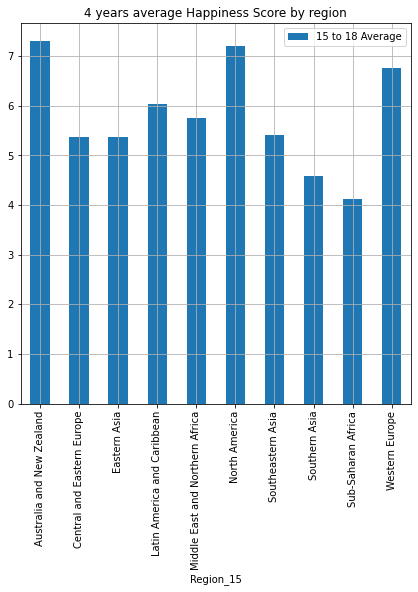

In [44]:
ave_region_happiness.plot(kind='bar', y='15 to 18 Average', grid=True, figsize=(7,7),
                         title="4 years average Happiness Score by region")

<AxesSubplot:title={'center':'4 years average GDP per cap of each region'}, xlabel='Region_15'>

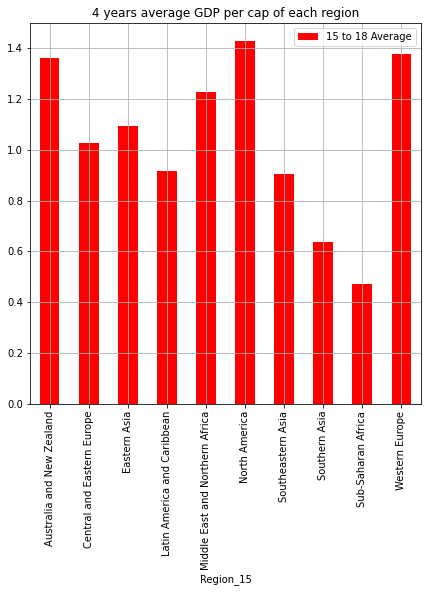

In [45]:
ave_region_GDPpercap.plot(kind='bar', y='15 to 18 Average', grid=True, color="r", figsize=(7,7),
                          title="4 years average GDP per cap of each region")

<AxesSubplot:title={'center':'Average Suicide Rate of each region'}, xlabel='Region_15'>

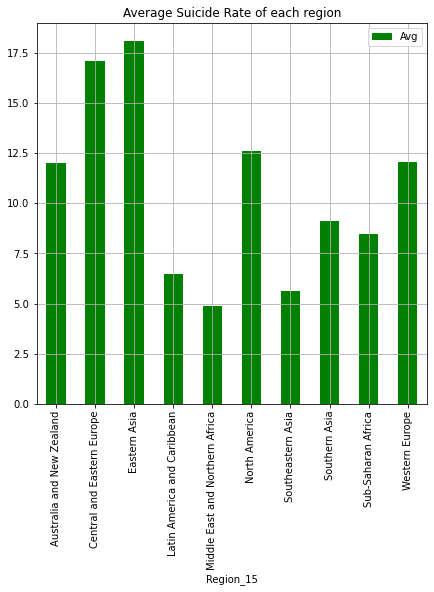

In [66]:
# the Average column is compiled from all of
# the periods from the original data frame
# not just from 2015 - 2018
suicide_rate_df = mergedfinalfiltered[['Region_15', 'Avg']] 

# the data inside Avg column were string type, I convert them back to numeric with to_numeric() function
suicide_rate_df.Avg = pd.to_numeric(suicide_rate_df.Avg)

# now I can use the mean() to look at the average suicide rate for the whole regions
avg_suicide_rate =suicide_rate_df.groupby(['Region_15']).mean()

avg_suicide_rate.plot(kind='bar', y='Avg', grid=True, color="g", figsize=(7,7),
                          title="Average Suicide Rate of each region")

## Observations:
* I compute the average of the Happiness Score (HS) by regions and by the years (vertically and horizontally)
* I do the same for the GDP per capita
### First hand observation:
* looking on the graphs, the patterns of HS and GDP per cap are consistent with each other:
    1. Rank highest in HS are Australia and New Zeland, Western Europe, and North America; those 3 regions also rank highest in GDP per cap.
    2. Rank lowest in HS are Sub-Sahara Africa and Southern Asia, those regions also rank lowest in GDP per cap.
    3. About the Average suicide rate, it's interesting. 
        * The highest ranking are Eastern Asia, Central and Eastern Europe, North America
        * The Lowest ranking are Mid and Northern Africa, Southern Asian
* It seems that "richer" regions are also "happier", and also tend to be more "suicidal"
* Poorer regions aren't so happy, but have lower suicide rate

# Happiness and GDP per cap, a deeper look at each country

In [18]:
mergedfinalfiltered[['Happiness Score_15', 'Economy (GDP per Capita)_15']]

,Happiness Score_15,Economy (GDP per Capita)_15
0,3.575,0.31982
1,4.033,0.75778
2,4.959,0.87867
3,6.901,1.42727
4,6.574,1.05351
...,...,...
124,6.003,0.63244
125,5.360,0.63216
126,4.642,0.92049
127,5.129,0.47038


In [34]:
# Setting up funciton to graph scatter plot and Regression line

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
def scater_regress(frame, x_column, y_column):
    
    (slope, intercept, r_value, p_value, stderr)= linregress(x_column, y_column)

    #set the regression equation to graph the line y = ax + b
    regression_value = x_column * slope + intercept
    #print out equ on the graph
    line_equ = "y = " + str(round(slope, 2)) + "x " + '+ ' + str(round(intercept,2))
    plt.figure(figsize=(8,8))
    plt.scatter(x_column, y_column)
    plt.plot(x_column, regression_value, "r")
    plt.annotate(line_equ, (1.5,6.5),color="r", fontsize=15)
    print(f"the r value: {round(r_value, 6)}")

## 2015 Regression line (Happiness Score and GDP per cap for by country) 

the r value: 0.801363


Text(0, 0.5, 'Happiness Score')

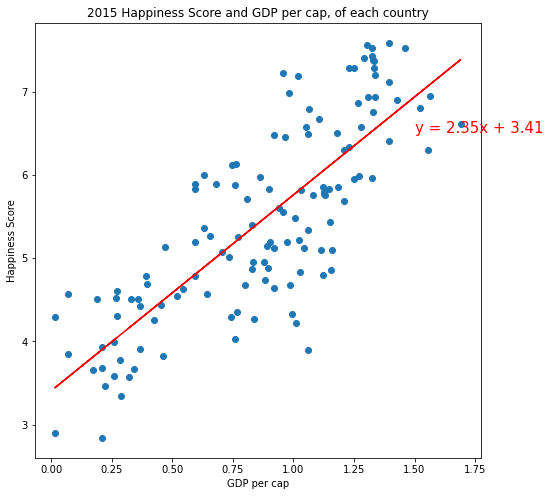

In [68]:
scater_regress(mergedfinalfiltered, mergedfinalfiltered['Economy (GDP per Capita)_15'], 
               mergedfinalfiltered['Happiness Score_15'])
plt.title('2015 Happiness Score and GDP per cap, of each country')
plt.xlabel('GDP per cap')
plt.ylabel('Happiness Score')

## 2016 Regression line (Happiness Score and GDP per cap for by country) 

the r value: 0.820505


Text(0, 0.5, 'Happiness Score')

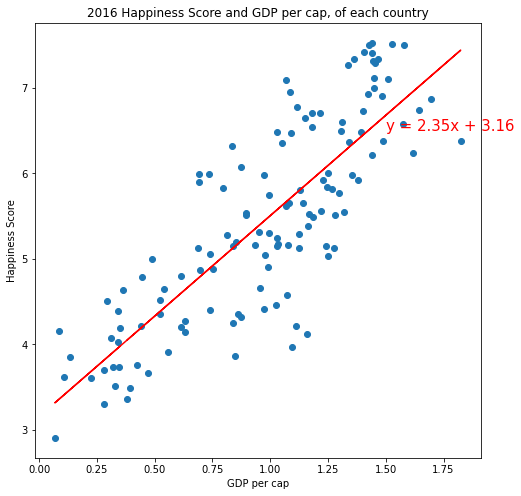

In [67]:
scater_regress(mergedfinalfiltered, mergedfinalfiltered['Economy (GDP per Capita)_16'], 
               mergedfinalfiltered['Happiness Score_16'])
plt.title('2016 Happiness Score and GDP per cap, of each country')
plt.xlabel('GDP per cap')
plt.ylabel('Happiness Score')

## 2017 Regression line (Happiness Score and GDP per cap for by country) 

the r value: 0.827939


Text(0, 0.5, 'Happiness Score')

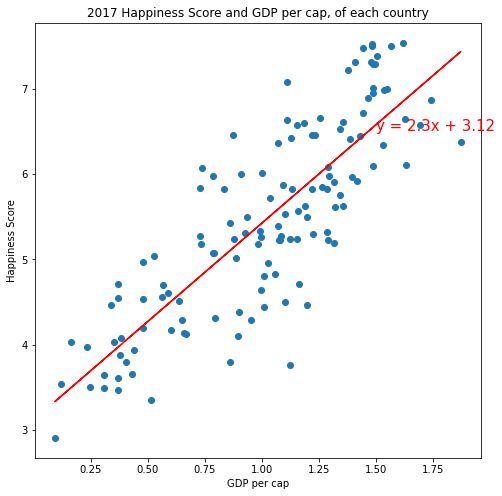

In [69]:
scater_regress(mergedfinalfiltered, mergedfinalfiltered['Economy..GDP.per.Capita._17'], 
               mergedfinalfiltered['Happiness.Score_17'])
plt.title('2017 Happiness Score and GDP per cap, of each country')
plt.xlabel('GDP per cap')
plt.ylabel('Happiness Score')

## 2018 Regression line (Happiness Score and GDP per cap for by country) 

the r value: 0.815095


Text(0, 0.5, 'Happiness Score')

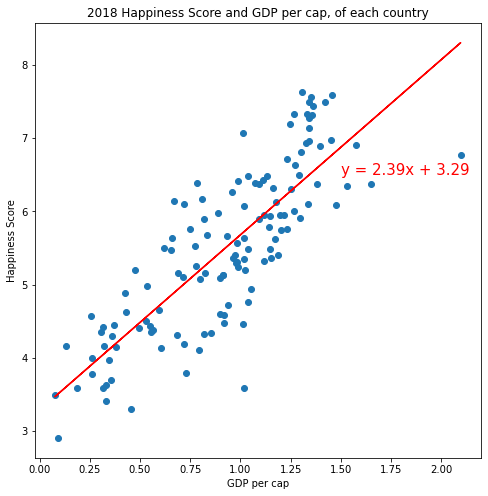

In [70]:
scater_regress(mergedfinalfiltered, mergedfinalfiltered['GDP per capita_18'], 
               mergedfinalfiltered['Score_18'])
plt.title('2018 Happiness Score and GDP per cap, of each country')
plt.xlabel('GDP per cap')
plt.ylabel('Happiness Score')

## Second Observation:
* Looking at the linear regression lines and the correlation coefficient (r-value):
    1. At each period (2015 to 2018), the correlation coefficients are above 0.8 (closing to 1), suggesting that there is a strong positive correlation between the Happiness and GDP per cap
    2. Regression lines show the trend of the data, all periods have an upward slope.

## Suicide Rate and Happiness Score Regression Line (by year)

the r value: 0.214671


Text(0, 0.5, 'Happiness Score')

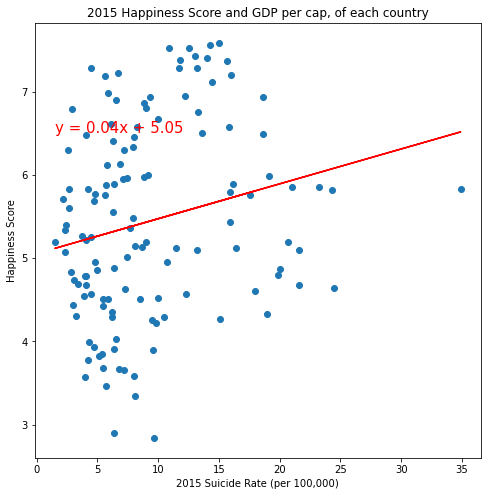

In [71]:
scater_regress(mergedfinalfiltered, mergedfinalfiltered['2015'], 
               mergedfinalfiltered['Happiness Score_15'])
plt.title('2015 Happiness Score and GDP per cap, of each country')
plt.xlabel('2015 Suicide Rate (per 100,000)')
plt.ylabel('Happiness Score')

the r value: 0.221952


Text(0, 0.5, 'Happiness Score')

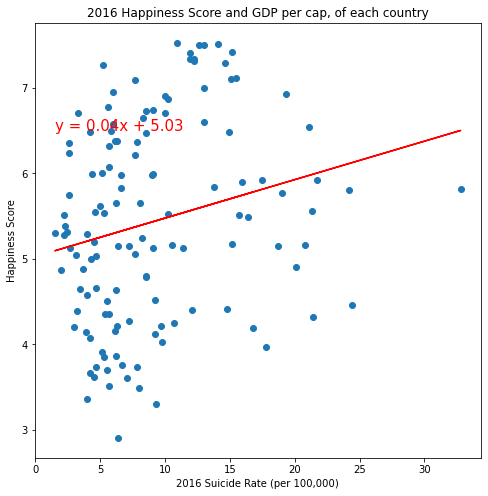

In [72]:
scater_regress(mergedfinalfiltered, mergedfinalfiltered['2016'], 
               mergedfinalfiltered['Happiness Score_16'])
plt.title('2016 Happiness Score and GDP per cap, of each country')
plt.xlabel('2016 Suicide Rate (per 100,000)')
plt.ylabel('Happiness Score')

the r value: 0.247268


Text(0, 0.5, 'Happiness Score')

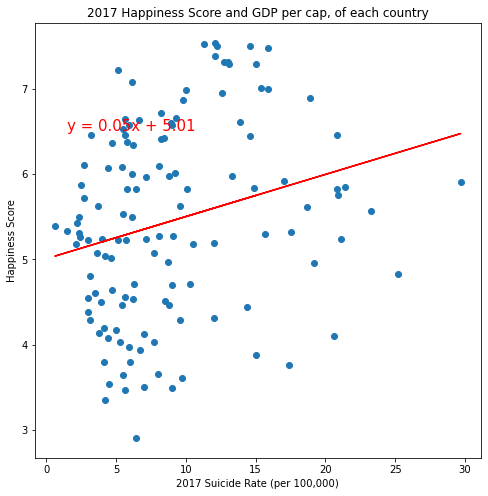

In [73]:
scater_regress(mergedfinalfiltered, mergedfinalfiltered['2017'], 
               mergedfinalfiltered['Happiness.Score_17'])
plt.title('2017 Happiness Score and GDP per cap, of each country')
plt.xlabel('2017 Suicide Rate (per 100,000)')
plt.ylabel('Happiness Score')

the r value: 0.259331


Text(0, 0.5, 'Happiness Score')

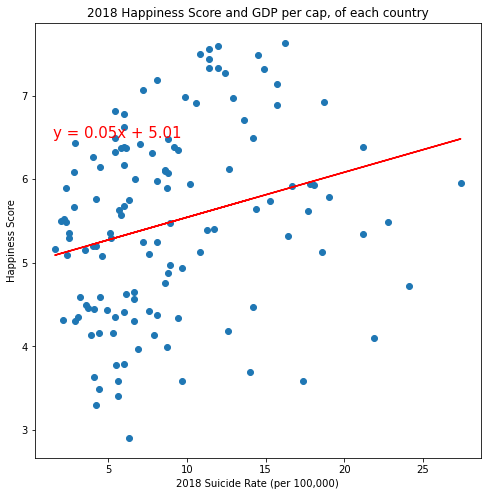

In [74]:
scater_regress(mergedfinalfiltered, mergedfinalfiltered['2018'], 
               mergedfinalfiltered['Score_18'])
plt.title('2018 Happiness Score and GDP per cap, of each country')
plt.xlabel('2018 Suicide Rate (per 100,000)')
plt.ylabel('Happiness Score')

## Observations about the correlation of Suicide Rate and Happiness score
* They have a positive correlation, it's a weak correlation (all 4 years has the r-value that is less than 0.3)
* Looking at the scatter plot, the data are pretty much spread out, they don't have any certain patterns

## Suicide Rate and GDP per cap Regression Lines (by year)

the r value: 0.335677


Text(0, 0.5, 'Suicide Rate')

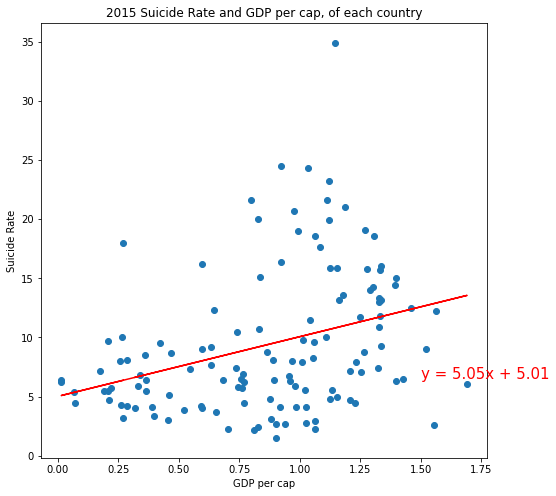

In [75]:
scater_regress(mergedfinalfiltered, mergedfinalfiltered['Economy (GDP per Capita)_15'], 
               mergedfinalfiltered['2015'])
plt.title('2015 Suicide Rate and GDP per cap, of each country')
plt.xlabel('GDP per cap')
plt.ylabel('Suicide Rate')

the r value: 0.334945


Text(0, 0.5, 'Suicide Rate')

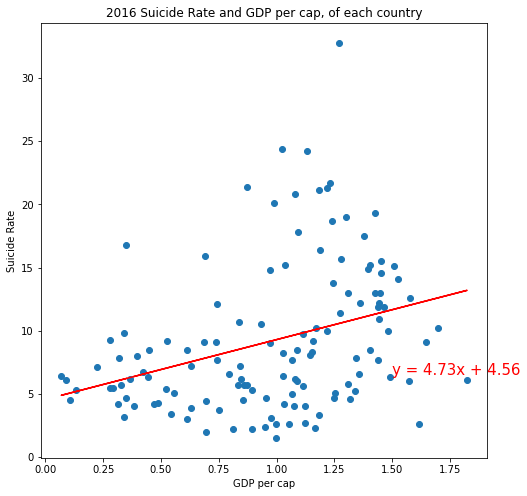

In [76]:
scater_regress(mergedfinalfiltered, mergedfinalfiltered['Economy (GDP per Capita)_16'], 
               mergedfinalfiltered['2016'])
plt.title('2016 Suicide Rate and GDP per cap, of each country')
plt.xlabel('GDP per cap')
plt.ylabel('Suicide Rate')

the r value: 0.350782


Text(0, 0.5, 'Suicide Rate')

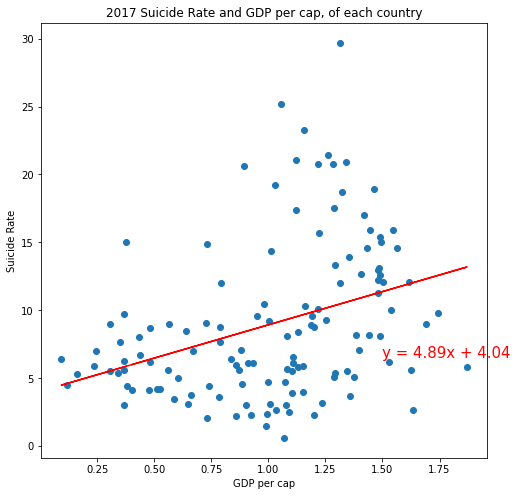

In [77]:
scater_regress(mergedfinalfiltered, mergedfinalfiltered['Economy..GDP.per.Capita._17'], 
               mergedfinalfiltered['2017'])
plt.title('2017 Suicide Rate and GDP per cap, of each country')
plt.xlabel('GDP per cap')
plt.ylabel('Suicide Rate')

the r value: 0.339538


Text(0, 0.5, 'Suicide Rate')

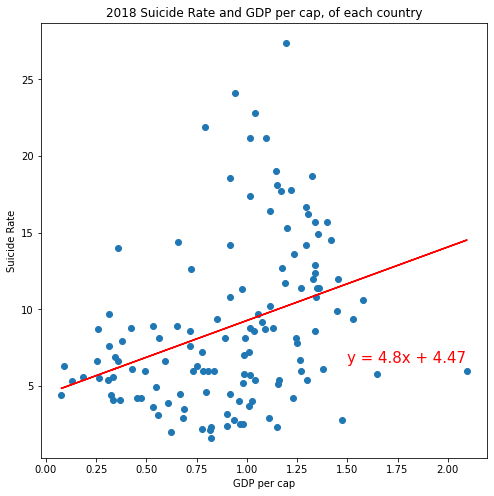

In [78]:
scater_regress(mergedfinalfiltered, mergedfinalfiltered['GDP per capita_18'], 
               mergedfinalfiltered['2018'])
plt.title('2018 Suicide Rate and GDP per cap, of each country')
plt.xlabel('GDP per cap')
plt.ylabel('Suicide Rate')

## Observations on GDP per cap and Suicide Rate
* There are positive correlation, but again, they are weak correlation (around 0.33)
* The scatter plot show some upward patterns (not so clear)